In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [2]:
import eikon as ek

In [3]:
creds = '443a647dd4514afb8c6e9577fa8f6e21d594620f'
ek.set_app_key(creds)

## 1. Data download

1.1. Data download via Excel Add-in

1.2. Data download via Refinitiv API

1.3. Comparison of data downloads

**1.2.1. Stocks**

- Apple
- Nike
- Pfizer
- Exxon Mobile
- McDonalds

In [4]:
stocks=['AAPL.O','NKE',"PFE","XOM","MCD" ]
stockprices = ek.get_timeseries(stocks, 'CLOSE', interval='monthly', start_date='2010-01-01',end_date='2020-12-31',)

stockprices.head(10)

CLOSE,AAPL.O,NKE,PFE,XOM,MCD
Date,,,,,
2010-01-31,6.859386,15.9375,17.688728,64.43,62.43
2010-02-28,7.307850,16.9000,16.636505,65.00,63.85
2010-03-31,8.392849,18.3750,16.257325,66.98,66.72
2010-04-30,9.324634,18.9775,15.849707,67.77,70.59
2010-05-31,9.174277,18.0950,14.437263,60.46,66.87
2010-06-30,8.983205,16.8875,13.517753,57.07,65.87
2010-07-31,9.187491,18.4100,14.219235,59.68,69.73
2010-08-31,8.682134,17.5000,15.081869,59.11,73.06
2010-09-30,10.133918,20.0350,16.276284,61.79,74.51


**1.2. Company specific variables / stock multiples**

- P/E Ratio
- EPS Dilluted
- Dividend Yield

Gibt es noch ein besseres Format? 

In [5]:
stocks = ['AAPL.O','NKE',"PFE","XOM","MCD"] 
stockmultiples1, err = ek.get_data(stocks, ["TR.PE.date", 'TR.F.DIVYLDCOMSTOCKGROSSISSUEPCT',"TR.PE","TR.F.EPSDILEXCLEXORDITEMSCOMTOT",], {'SDate': '2010-01-01', 'EDate': '2020-12-31','Frq':'M'})
stockmultiples1.head(10)

,Instrument,Date,Dividend Yield - Common - Gross - Issue - %,P/E (Daily Time Series Ratio),EPS - Diluted - excl Exord Items Applicable to Common Total
0,AAPL.O,2010-01-29T00:00:00Z,0.0,18.744565,0.32426
1,AAPL.O,2010-02-26T00:00:00Z,0.0,19.970077,0.32426
2,AAPL.O,2010-03-31T00:00:00Z,0.0,22.935041,0.32426
3,AAPL.O,2010-04-30T00:00:00Z,0.0,22.157721,0.32426
4,AAPL.O,2010-05-28T00:00:00Z,0.0,21.800434,0.32426
5,AAPL.O,2010-06-30T00:00:00Z,0.0,21.346400,0.32426
6,AAPL.O,2010-07-30T00:00:00Z,0.0,19.370632,0.32426
7,AAPL.O,2010-08-31T00:00:00Z,0.0,18.305153,0.32426
8,AAPL.O,2010-09-30T00:00:00Z,0.0,21.366052,0.32426
9,AAPL.O,2010-10-29T00:00:00Z,0.0,19.867434,0.54121


In [6]:
stockmultiples1.tail(10)

,Instrument,Date,Dividend Yield - Common - Gross - Issue - %,P/E (Daily Time Series Ratio),EPS - Diluted - excl Exord Items Applicable to Common Total
650,MCD,2020-03-31T00:00:00Z,2.393604,20.691355,7.98719
651,MCD,2020-04-30T00:00:00Z,2.393604,23.470642,7.98719
652,MCD,2020-05-29T00:00:00Z,2.393604,24.250249,7.98719
653,MCD,2020-06-30T00:00:00Z,2.393604,24.009465,7.98719
654,MCD,2020-07-31T00:00:00Z,2.393604,25.286273,7.98719
655,MCD,2020-08-31T00:00:00Z,2.393604,33.592609,7.98719
656,MCD,2020-09-30T00:00:00Z,2.393604,34.531856,7.98719
657,MCD,2020-10-30T00:00:00Z,2.393604,33.510799,7.98719
658,MCD,2020-11-30T00:00:00Z,2.393604,32.938318,7.98719
659,MCD,2020-12-31T00:00:00Z,2.393604,32.505078,7.98719


**1.3. Macroeconomic variables**

- CPI, % Year on year, Monthly, NSA, Bureau of Labor Statistics, U.S. Department of Labor, in %: USCPNY = ECI
- Core CPI (All itema less food and energy) Index, Monthly, 1982 -1984 = 100, Actual und nicht in % (als Index) Bureau of Labor Statistics, U.S. Department of Labor: aUSCPIXFE
- Crude Oil WTI Cushing US FOB, Monthly, Index: WTC-
- US, Consumer Surveys, University of Michigan, Chg. Y/Y, 5 Year Inflation Expectations (median), in %: USUM5F=ECI
- Retail Sales YoY * (FEB 2022) | Retail Sales, Total including food services, SA, Chg Y/Y, in %: USRSLY=ECI
- Industrial Production Index, % YoY, Chg Y/Y, 2010 = 100, Federal Reserve, in %: aUSCINDYG/CA
- Brave-Butters-Kelley Indexes, Monthly GDP Growth, Monthly, NSA, Federal Reserve Bank of Chicago) -> aUSCBBKGPR
- Unemployment Rate Monthly, SA, Bureau of Labor Statistics, U.S. Department of Labor, in % aber absolut – keine rel. Veränderung:  USUNR=ECI
- Fed Funds Effective Rate, Monthly, NSA, Federal Reserve, United States, in % aber absolut – keine rel. Veränderung:   aUSFEDFUND

In [7]:
macrodata1 =['USCPNY=ECI', 'aUSCPIXFE', 'USUM5F=ECI', 'USRSLY=ECI', 'aUSCINDYG/CA', 'aUSCBBKGPR', 'USUNR=ECI', 'aUSFEDFUND'] 
macros1 = ek.get_timeseries(macrodata1, interval='monthly', start_date='2010-01-01',end_date='2020-12-31',)
macros1.head(10)

VALUE,USCPNY=ECI,aUSCPIXFE,USUM5F=ECI,USRSLY=ECI,aUSCINDYG/CA,aUSCBBKGPR,USUNR=ECI,aUSFEDFUND
Date,,,,,,,,
2010-01-31,2.6,220.086,2.9,2.68,0.780511,1.284512,9.8,0.11
2010-02-28,2.1,220.602,2.7,3.37,1.770202,1.279363,9.8,0.13
2010-03-31,2.3,221.059,2.7,7.47,4.185810,3.525531,9.9,0.16
2010-04-30,2.2,221.166,2.7,7.85,5.385464,4.394068,9.9,0.20
2010-05-31,2.0,221.193,2.9,6.00,7.948415,4.906860,9.6,0.20
2010-06-30,1.1,221.265,2.8,4.08,8.519168,3.327528,9.4,0.18
2010-07-31,1.2,221.258,2.9,4.15,7.754898,2.743612,9.4,0.18
2010-08-31,1.1,221.551,2.8,2.93,6.922433,2.451665,9.5,0.19
2010-09-30,1.1,221.907,2.7,6.19,6.312981,3.040643,9.5,0.19


In [8]:
macrodata2 =['WTC-'] 
macros2 = ek.get_timeseries(macrodata2, 'CLOSE', interval='monthly', start_date='2010-01-01',end_date='2020-12-31',)
macros2.head(10)

WTC-,CLOSE
Date,
2010-01-31,72.85
2010-02-28,79.72
2010-03-31,83.45
2010-04-30,86.07
2010-05-31,74.00
2010-06-30,75.59
2010-07-31,78.85
2010-08-31,71.93
2010-09-30,79.95


In [9]:
macros3 = pd.concat([macros2, macros1], axis= 1) #Data Frames zusammenführen
macros3.head(10)

,CLOSE,USCPNY=ECI,aUSCPIXFE,USUM5F=ECI,USRSLY=ECI,aUSCINDYG/CA,aUSCBBKGPR,USUNR=ECI,aUSFEDFUND
Date,,,,,,,,,
2010-01-31,72.85,2.6,220.086,2.9,2.68,0.780511,1.284512,9.8,0.11
2010-02-28,79.72,2.1,220.602,2.7,3.37,1.770202,1.279363,9.8,0.13
2010-03-31,83.45,2.3,221.059,2.7,7.47,4.185810,3.525531,9.9,0.16
2010-04-30,86.07,2.2,221.166,2.7,7.85,5.385464,4.394068,9.9,0.20
2010-05-31,74.00,2.0,221.193,2.9,6.00,7.948415,4.906860,9.6,0.20
2010-06-30,75.59,1.1,221.265,2.8,4.08,8.519168,3.327528,9.4,0.18
2010-07-31,78.85,1.2,221.258,2.9,4.15,7.754898,2.743612,9.4,0.18
2010-08-31,71.93,1.1,221.551,2.8,2.93,6.922433,2.451665,9.5,0.19
2010-09-30,79.95,1.1,221.907,2.7,6.19,6.312981,3.040643,9.5,0.19


## 2. Data Analysis

**2.1. General analysis**

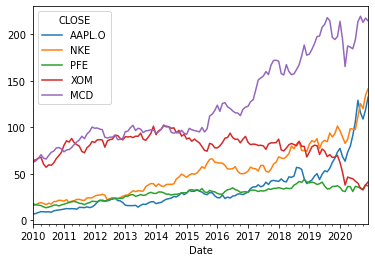

In [10]:
stockprices.plot()

In [11]:
stockprices.describe() 

CLOSE,AAPL.O,NKE,PFE,XOM,MCD
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,34.088388,52.377405,28.954227,78.705909,125.384318
std,25.222987,28.015939,7.287106,14.697221,45.220986
min,6.859386,15.937500,13.517753,32.620000,62.430000
25%,17.307108,27.013750,23.570752,73.835000,93.727500
50%,27.123750,50.505000,30.443382,81.820000,101.060000
75%,42.271875,68.262500,34.059808,87.382500,163.010000
max,132.690000,141.470000,43.823682,102.410000,219.490000


In [12]:
stockmultiples1.describe()

,Dividend Yield - Common - Gross - Issue - %,P/E (Daily Time Series Ratio),EPS - Diluted - excl Exord Items Applicable to Common Total
count,660.000000,660.000000,660.000000
mean,2.417546,22.906132,3.201751
std,1.205641,17.516364,2.372586
min,0.000000,9.081837,0.324260
25%,1.370990,16.380672,1.337300
50%,2.393604,19.653048,2.301690
75%,3.500534,24.934716,4.812410
max,7.624413,195.101664,9.697490


**2.2. Check for missing data**

In [13]:
stockprices.isnull().sum()

CLOSE
AAPL.O    0
NKE       0
PFE       0
XOM       0
MCD       0
dtype: int64

In [14]:
stockmultiples1.isnull().sum()

Instrument                                                     0
Date                                                           0
Dividend Yield - Common - Gross - Issue - %                    0
P/E (Daily Time Series Ratio)                                  0
EPS - Diluted - excl Exord Items Applicable to Common Total    0
dtype: int64

In [15]:
macros3.isnull().sum()

CLOSE           0
USCPNY=ECI      0
aUSCPIXFE       0
USUM5F=ECI      0
USRSLY=ECI      0
aUSCINDYG/CA    0
aUSCBBKGPR      0
USUNR=ECI       0
aUSFEDFUND      0
dtype: int64

**2.3. Test for unit root / stationarity**

**2.4. Data adjustment** -> Parameter stationär machen + Data sample splitten in Training / Test

**Fragen**: 
- Wie bringen wir Stockmultiples ins OLS Modell? Alles in eine Liste?
- Was machen wir mit den Exceldaten? Sollen wir diese auch irgendwo aufzeigen? 
- Kann man Macrodaten umbennen? 
- müssen wir unit root test, heteroskedastie, etc. auf das gesamte Modell oder auf die einzelenen Variabeln anwenden? 

2.5. Verbindung mit SQL Database

## 3. OLS Regression

In [16]:
import statsmodels.api as sm
y = stockprices['AAPL.O']
x = macros3
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit()
print(results.summary()) #Einfluss von WTI Index bei Apple überhaupt nicht signifikant -> siehe BSP für Exxon

                            OLS Regression Results                            
Dep. Variable:                 AAPL.O   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     186.0
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           7.69e-67
Time:                        15:32:31   Log-Likelihood:                -435.36
No. Observations:                 132   AIC:                             890.7
Df Residuals:                     122   BIC:                             919.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -691.7308     35.589    -19.437   

In [17]:
y = stockprices['XOM']
x = macros3
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit()
print(results.summary()) #bei Exxon ist WTI sehr signifikant

                            OLS Regression Results                            
Dep. Variable:                    XOM   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     48.00
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           6.02e-36
Time:                        15:32:31   Log-Likelihood:                -441.70
No. Observations:                 132   AIC:                             903.4
Df Residuals:                     122   BIC:                             932.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          318.3857     37.338      8.527   

**4. Out-of Sample Test**

**5. Moving Window Regressions**